# Preliminary Analysis of Lead Pipes Data

In [23]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.neighbors import BallTree

In [24]:
# Upload cleaned data set
df = pd.read_csv("df_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224190 entries, 0 to 224189
Data columns (total 17 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Unnamed: 0                                                    224190 non-null  int64  
 1   PARCEL ID                                                     224190 non-null  object 
 2   YEARBLT                                                       224190 non-null  float64
 3   APPRTOT                                                       224190 non-null  float64
 4   PRICE                                                         224190 non-null  float64
 5   GRADE                                                         224190 non-null  object 
 6   NBRHD                                                         224190 non-null  float64
 7   Street Number                                           

/var/folders/2l/qpy8_v3d5x7glst5y2hhkz6m0000gn/T/ipykernel_50085/807207090.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_cleaned.csv")


In [25]:
# Get stats on lead vs non-lead customer service line material
lead_counts_customer = df["Customer-Owned Portion Service Line Material Classification"].eq('PB').sum()
gal_counts_customer = df["Customer-Owned Portion Service Line Material Classification"].eq('GAL').sum()
nonlead_counts_customer = df["Customer-Owned Portion Service Line Material Classification"].isin(['CU','OT','PL']).sum()
unknown_counts_customer = df["Customer-Owned Portion Service Line Material Classification"].eq('MU').sum()

print("Customer Service Line Summary")
print(f"Properties with lead pipes: {lead_counts_customer}")
print(f"Properties with galvanized pipes: {gal_counts_customer}")
print(f"Properties with non-lead pipes: {nonlead_counts_customer}")
print(f"Properties with galvanized pipes: {gal_counts_customer}")
print(f"Properties with unknown service line material: {unknown_counts_customer}")

Customer Service Line Summary
Properties with lead pipes: 0
Properties with galvanized pipes: 8601
Properties with non-lead pipes: 160137
Properties with galvanized pipes: 8601
Properties with unknown service line material: 55452


In [38]:
# Get stats on lead vs non-lead city service line material
lead_counts_city = df["System-Owned Portion Service Line Material Classification "].eq('PB').sum()
gal_counts_city = df["System-Owned Portion Service Line Material Classification "].eq('GAL').sum()
nonlead_counts_city = df["System-Owned Portion Service Line Material Classification "].isin(['CU','OT','PL']).sum()
unknown_counts_city = df["System-Owned Portion Service Line Material Classification "].eq('MU').sum()

print("City Service Line Summary")
print(f"Properties with lead pipes: {lead_counts_city}")
print(f"Properties with galvanized pipes: {gal_counts_city}")
print(f"Properties with non-lead pipes: {nonlead_counts_city}")
print(f"Properties with galvanized pipes: {gal_counts_city}")
print(f"Properties with unknown service line material: {unknown_counts_city}")

City Service Line Summary
Properties with lead pipes: 17236
Properties with galvanized pipes: 3384
Properties with non-lead pipes: 180760
Properties with galvanized pipes: 3384
Properties with unknown service line material: 0


In [31]:
# Remove homes with unknown service line material
df = df[df["System-Owned Portion Service Line Material Classification "] != "MU"]

In [32]:
np.sort(df["YEARBLT"].unique())

array([1800., 1803., 1805., 1807., 1810., 1811., 1813., 1819., 1820.,
       1824., 1825., 1826., 1833., 1836., 1837., 1839., 1840., 1842.,
       1843., 1844., 1845., 1847., 1848., 1850., 1851., 1852., 1853.,
       1854., 1855., 1856., 1858., 1859., 1860., 1861., 1863., 1864.,
       1865., 1866., 1867., 1868., 1869., 1870., 1871., 1872., 1873.,
       1874., 1875., 1876., 1877., 1878., 1879., 1880., 1881., 1882.,
       1883., 1884., 1885., 1886., 1887., 1888., 1889., 1890., 1891.,
       1892., 1893., 1894., 1895., 1896., 1897., 1898., 1899., 1900.,
       1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908., 1909.,
       1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917., 1918.,
       1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927.,
       1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936.,
       1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944., 1945.,
       1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954.,
       1955., 1956.,

In [33]:
df["is_lead"] = (df["System-Owned Portion Service Line Material Classification "]=="PB").astype(int)

In [34]:
df.sample(n=10)

,Unnamed: 0,PARCEL ID,YEARBLT,APPRTOT,PRICE,GRADE,NBRHD,Street Number,Street Name,City,Zip Code,County,Latitude,Longitude,System-Owned Portion Service Line Material Classification,If Non-Lead in Column R.. Was Material Ever Previously Lead?,Customer-Owned Portion Service Line Material Classification,is_lead
78681,82643,010-119030,1958.0,112300.0,0.0,D+1,74.05,1311,GROVEWOOD DR,COLUMBUS,43207-3211,FRANKLIN,39.904019,-82.960167,CU,N,OT,0
140468,147811,570-207190,1988.0,209200.0,105900.0,C,85.07,5801,RICARDO DR,GALLOWAY,43119-9309,FRANKLIN,39.918984,-83.147762,PL,N,OT,0
9601,10119,273-003361,1987.0,467500.0,315000.0,B,13.60,7671,ALDRIDGE PL,DUBLIN,43017-8530,FRANKLIN,40.124177,-83.133851,PL,N,OT,0
121063,127555,010-027148,1923.0,84100.0,50000.0,C-1,94.09,154,NASHOBA AVE,COLUMBUS,43223-1216,FRANKLIN,39.952869,-83.051210,PB,N,PL,1
141008,148372,070-005182,1954.0,353400.0,0.0,C+1,21.02,2045,RIDGECLIFF RD,COLUMBUS,43221-1945,FRANKLIN,40.022703,-83.068103,CU,N,MU,0
86066,90287,010-115555,1951.0,205800.0,0.0,D+2,74.01,541,HILOCK RD,COLUMBUS,43207-3122,FRANKLIN,39.897174,-82.981086,CU,N,MU,0
223017,35805,570-215957,1990.0,406000.0,305000.0,C+1,40.40,3641,WHITWORTH WAY,COLUMBUS,43228-7001,FRANKLIN,39.988531,-83.102152,PL,N,OT,0
190589,48,010-072922,1949.0,142800.0,112000.0,D+2,40.09,2579,AUDUBON RD,COLUMBUS,43211-1149,FRANKLIN,40.017377,-82.991087,CU,Y,GAL,0
67424,70904,113-002176,2018.0,4400.0,287641.0,C+2,41.01,4866,FARVIEW RD,COLUMBUS,43231,FRANKLIN,40.074250,-82.933041,CU,N,PL,0
18808,19625,010-030092,1903.0,226900.0,0.0,C,91.01,736,BELLOWS AVE,COLUMBUS,43222-1602,FRANKLIN,39.953040,-83.018995,CU,N,PL,0


In [35]:
"""
fig = px.density_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    z=None,
    radius=1.5,
    center=dict(lat=39.9625, lon=-83.0032),
    zoom=9,
    mapbox_style="open-street-map",
    width=800,
    height=800
)
fig.show()
"""

'\nfig = px.density_mapbox(\n    df,\n    lat="Latitude",\n    lon="Longitude",\n    z=None,\n    radius=1.5,\n    center=dict(lat=39.9625, lon=-83.0032),\n    zoom=9,\n    mapbox_style="open-street-map",\n    width=800,\n    height=800\n)\nfig.show()\n'

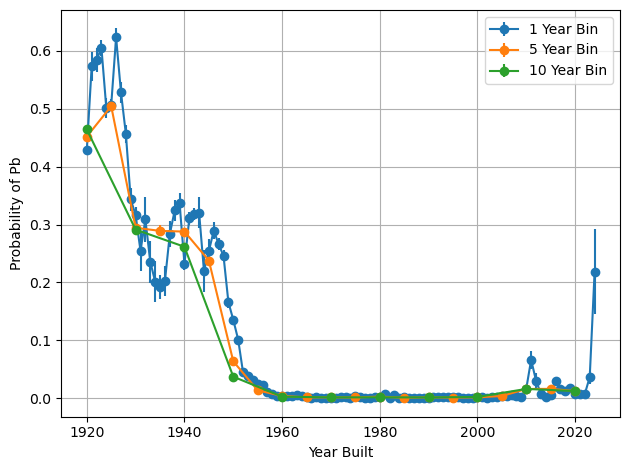

In [42]:
def get_yearbuilt_stats(df, binsize):
    # Bin years
    df["year_vals"] = (df["YEARBLT"] // binsize) * binsize
    
    # Clip all data before 1920 
    df["year_vals"] = df["year_vals"].clip(lower=1920) 

    # Compute stats
    grouped = df.groupby("year_vals")["is_lead"]
    average_by_year = grouped.mean()
    counts_by_year = grouped.count()
    std_by_year = np.sqrt(average_by_year * (1 - average_by_year) / counts_by_year)

    # Reset index to make plotting easier
    stats_df = pd.DataFrame({
        "year": average_by_year.index,
        "average": average_by_year.values,
        "count": counts_by_year.values,
        "std": std_by_year.values
    })

    # Clean up
    df.drop("year_vals", axis=1, inplace=True)

    return stats_df

# Run for different bin sizes
stats_01 = get_yearbuilt_stats(df.copy(), 1)
stats_05 = get_yearbuilt_stats(df.copy(), 5)
stats_10 = get_yearbuilt_stats(df.copy(), 10)

# Plot probability of having lead pipes for different bin sizes
plt.errorbar(stats_01["year"], stats_01["average"], yerr=stats_01["std"], fmt='o-', label='1 Year Bin')
plt.errorbar(stats_05["year"], stats_05["average"], yerr=stats_05["std"], fmt='o-', label='5 Year Bin')
plt.errorbar(stats_10["year"], stats_10["average"], yerr=stats_10["std"], fmt='o-', label='10 Year Bin')
plt.xlabel("Year Built")
plt.ylabel("Probability of Pb")
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig("averageLead_per_year.png", dpi=201)
plt.show()

Notes on the plot:

Seems to be a sharp drop off during the period from 1930-1960, which matches with timing of legislation. 

Some "outliers" to logistic regression located in 2010-2024. These are likely from new homes built in historic neighborhoods

Logistic regression could capture this trend. Appears that homes built before 1930 have ~40% chance of having lead service lines. After 1960, that probability drops to nearly zero. 


In [ ]:
# Preprocessing (same as before)
df['lat_rad'] = np.radians(df['Latitude'])
df['lon_rad'] = np.radians(df['Longitude'])
coords = df[['lat_rad', 'lon_rad']].to_numpy()
df['is_lead_pm'] = df['is_lead'].replace(0,-1)
lead = df['is_lead_pm'].to_numpy()
mu = np.mean(lead)
lead_dev = lead - mu

# Parameters
n_samples = 100_000_000  # number of pairs to sample
bin_edges_km = np.linspace(0, 10.0, 201) #np.linspace(0, 2.0, 41)  # 40 bins, 50m wide
bin_centers = 0.5 * (bin_edges_km[:-1] + bin_edges_km[1:])
bin_edges_rad = bin_edges_km / 6371.0

# pick out random points
N = len(coords)
sample_i = np.random.randint(0, N, size=n_samples)
sample_j = np.random.randint(0, N, size=n_samples)
mask = sample_i != sample_j  # avoid self-pairs
sample_i = sample_i[mask]
sample_j = sample_j[mask]

lat1 = coords[sample_i][:, 0]
lon1 = coords[sample_i][:, 1]
lat2 = coords[sample_j][:, 0]
lon2 = coords[sample_j][:, 1]

dlat = lat2 - lat1
dlon = lon2 - lon1

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arcsin(np.sqrt(a))
distances_km = 6371.0 * c

from scipy.stats import binned_statistic

products = lead_dev[sample_i] * lead_dev[sample_j]
correlation, _, _ = binned_statistic(
    distances_km, products, statistic='mean', bins=bin_edges_km)
counts, _, _ = binned_statistic(
    distances_km, products, statistic='count', bins=bin_edges_km)

# Calculate "ideal" correlation value
p_lead = lead_counts_city/(lead_counts_city+nonlead_counts_city)
correlation_ideal = 4*(p_lead-p_lead**2)

plt.axhline(y=correlation_ideal, color='r', linestyle='--', label='Perfect Spatial Correlation')
plt.plot(bin_centers, correlation, marker='o', label='Random Sampling of Property Pairs')
plt.xlabel('Distance r (km)')
plt.ylabel('Spatial correlation C(r)')
plt.grid(True)
#plt.title('Approximate Spatial Correlation')
plt.savefig("spatial_correlation.png", dpi=201)
plt.legend()
plt.show()